# 4 - Rational Approximations to Quasiperiodically forced pendulum
I want to understand the bifurcation diagram of the system

$$ \frac{dX}{dt} + \sin(X) = a + b_1 \sin(\omega t) + b_2 \sin(\frac{p}{q} \omega t + \phi_0) $$ 

Specifically, I want to understand the nature of attractors with everything fixed except the initial phase shift.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate
from numba import jit,njit

# Integrator

In [66]:
@njit
def f(phi):
    '''
        Current-phase relationship for the junction
    '''
    return np.sin(phi)

@njit
def current( t, a, b1, b2, Omega, eta, phi_0):
    '''
        Current applied to the junction
    '''
    return a + b1 * np.sin(Omega*t) + b2 * np.sin(eta*Omega*t + phi_0) 


@njit
def dy_dt(y, t, a, b1, b2, Omega, eta, phi_0):
    '''
        y = phi
        dphi_dt = -sin(phi) + a + b1 * sin(Omega*t) + b2 * sin(eta*Omega*t + phi_0) 
    '''
    return -f(y) + current(t,a,b1,b2,Omega,eta,phi_0) 

In [67]:
def integrate(params):
    periods = params['periods']
    points_per_period = params['points_per_period']
    num_points = points_per_period*periods
    t_vec = np.linspace(0,periods*2*np.pi/params['Omega'],num_points)
    y_0 = params['y_0']
    y_vec = scipy.integrate.odeint(dy_dt,y_0,t_vec,args=(params['a'],params['b1'],params['b2'],params['Omega'],params['eta'],params['phi_0']))
    return y_vec[:,0],t_vec

In [68]:
def calc_voltage(y_vec,t_vec,params):
    '''
        Calculate voltage by averaging the phase velocity
        Normalized so that steps are integers.
    '''
    dy_dt_vec = np.gradient(y_vec,t_vec) 
    T = t_vec[-1] - t_vec[0]
    voltage = scipy.integrate.simps(dy_dt_vec,t_vec)/(T*params['Omega'])
    return voltage

# Solution at a single point

Voltage 0.6185285055848794


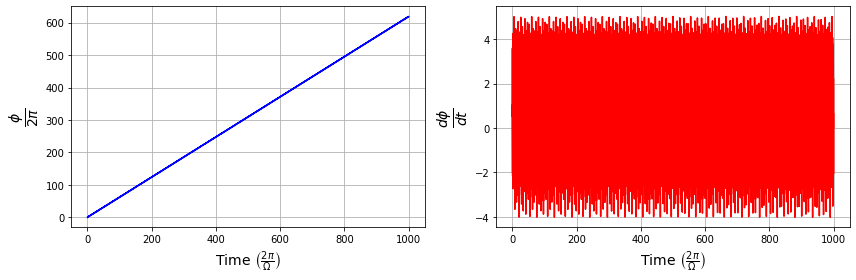

In [69]:
params = {
    'Omega' : 1,
    'periods' : 1000,
    'points_per_period' : 500,
    'y_0' : 0,
    'a' : 0.5,
    'b1' : 2,
    'b2' : 2,
    'eta' : 2,
    'phi_0' : 0,
}
y_vec,t_vec = integrate(params)

dy_dt_vec = np.gradient(y_vec,t_vec) 
voltage = calc_voltage(y_vec,t_vec,params)

fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(t_vec/(2*np.pi/params['Omega']),y_vec/(2*np.pi),'b')
ax[0].set_xlabel(r"Time $\left( \frac{2\pi}{\Omega} \right)$",fontsize=14)
ax[0].set_ylabel(r"$\frac{\phi}{2\pi}$",fontsize=20)
ax[0].grid(True)

ax[1].plot(t_vec/(2*np.pi/params['Omega']),dy_dt_vec,'r')
ax[1].set_xlabel(r"Time $\left( \frac{2\pi}{\Omega} \right)$",fontsize=14)
ax[1].set_ylabel(r"$\frac{d\phi}{dt}$",fontsize=20)
ax[1].grid(True)

plt.tight_layout()
print('Voltage',voltage)

# Poincare Map

In [70]:
points_per_period = params['points_per_period']
eta = params['eta']
omega = params['Omega']

phi1_samp = y_vec[::points_per_period]
phi2_samp = eta*omega*t_vec[::points_per_period]

phi1_wrap = np.arctan2(np.sin(phi1_samp),np.cos(phi1_samp)) 
phi2_wrap = np.arctan2(np.sin(phi2_samp),np.cos(phi2_samp)) 

(-1.0, 1.0)

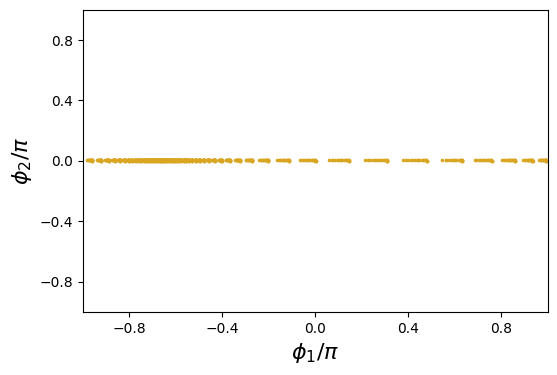

In [71]:
%matplotlib inline
plt.figure(dpi=100)

# number of points to skip to avoid seeing the transient
init_skip = 10
plt.scatter(phi1_wrap[init_skip:]/np.pi,phi2_wrap[init_skip:]/np.pi,color='goldenrod',s=10,marker='.')

plt.xlabel(r"$\phi_1/\pi$",fontsize=16)
plt.ylabel(r"$\phi_2/\pi$",fontsize=16)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.ylim([-1,1])
plt.xlim([-1,1])

# Attractor for different $\phi_0$

(-1.0, 1.0)

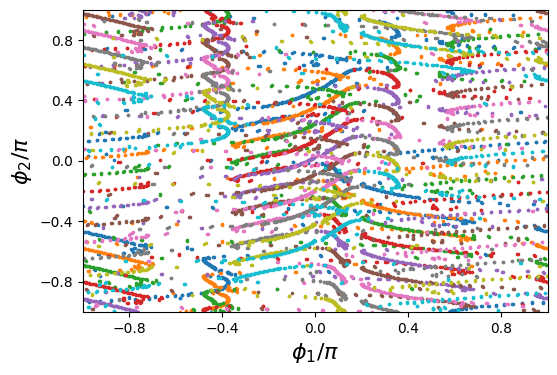

In [101]:
phi_0_vec = np.linspace(0,np.pi,10)

params = {
    'Omega' : 1,
    'periods' : 1000,
    'points_per_period' : 500,
    'y_0' : 0,
    'a' : 0.0,
    'b1' : 2.7,
    'b2' : 2.7,
    'eta' : 1.618,
}
points_per_period = params['points_per_period']
eta = params['eta']
omega = params['Omega']

%matplotlib inline
plt.figure(dpi=100)
for ind,phi_0 in enumerate(phi_0_vec):
    params['phi_0'] = phi_0
    y_vec,t_vec = integrate(params)
    dy_dt_vec = np.gradient(y_vec,t_vec) 

    phi1_samp = y_vec[::points_per_period]
    phi2_samp = eta*omega*t_vec[::points_per_period]

    phi1_wrap = np.arctan2(np.sin(phi1_samp),np.cos(phi1_samp)) 
    phi2_wrap = np.arctan2(np.sin(phi2_samp),np.cos(phi2_samp)) 

    # number of points to skip to avoid seeing the transient
    init_skip = 10
    plt.scatter(phi1_wrap[init_skip:]/np.pi,phi2_wrap[init_skip:]/np.pi, s=10,marker='.')

plt.xlabel(r"$\phi_1/\pi$",fontsize=16)
plt.ylabel(r"$\phi_2/\pi$",fontsize=16)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.ylim([-1,1])
plt.xlim([-1,1])

## Voltage vs $\phi_0$

In [127]:
phi_0_vec = np.linspace(-np.pi,np.pi,250)

params = {
    'Omega' : 1,
    'periods' : 250,
    'points_per_period' : 200,
    'y_0' : 0,
    'a' : 0.0,
    'b1' : 2.8,
    'b2' : 2.8,
    'eta' :1.5,
}
voltage_vec = np.zeros(len(phi_0_vec))
for ind,phi_0 in enumerate(phi_0_vec):
    params['phi_0'] = phi_0
    y_vec,t_vec = integrate(params)
    dy_dt_vec = np.gradient(y_vec,t_vec) 
    voltage = calc_voltage(y_vec,t_vec,params)
    voltage_vec[ind] = voltage

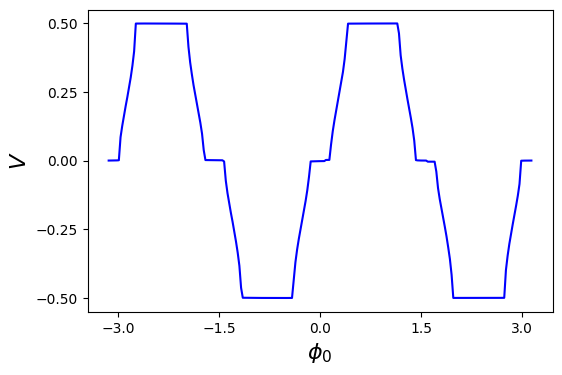

In [128]:
%matplotlib inline
plt.figure(dpi=100)

plt.plot(phi_0_vec,voltage_vec,color='b')

plt.xlabel(r"$\phi_0$",fontsize=16)
plt.ylabel(r"$V$",fontsize=16)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

#plt.ylim([-0.7,0.7])